In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables as tb

from invisible_cities.cities import components as cp
from invisible_cities.database import load_db

In [2]:
file_name = "/Users/taylorcontreras/Development/Research/trackingplane/data/fast_sims/flex_0vbb_fast_size1.3_pitch15.00.1.detsim.h5"

In [3]:
config = pd.read_hdf(file_name, "MC/configuration")
config

FileNotFoundError: File /Users/taylorcontreras/Development/Research/trackingplane/data/fast_sims/flex_0vbb_fast_size1.3_pitch15.00.1.detsim.h5 does not exist

In [ ]:
# Gather waveform information to be used for calculated pedestal, event by event
detsim_data = cp.wf_from_files([file_name], cp.WfType.mcrd)
fast_pmt_events = []
fast_sipm_events = []
try:
    while detsim_data:
        thisdata = next(detsim_data)
        fast_pmt_events.append(thisdata['pmt'])
        fast_sipm_events.append(thisdata['sipm'])
except StopIteration:
    pass

finally:
    del detsim_data

In [5]:
summed_sipms = np.sum(np.sum(fast_sipm_events, axis=1),axis=1)

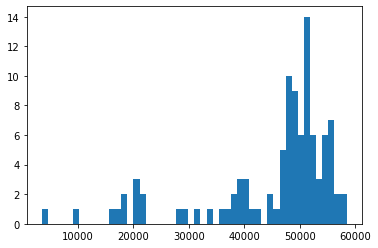

In [6]:
plt.hist(summed_sipms, bins=50)
plt.show()

In [5]:
full_file_name = "/Users/taylorcontreras/Development/Research/trackingplane/data/fast_sims/flex.0vbb.1.fullsim_buffy.h5"

In [6]:
# Gather waveform information to be used for calculated pedestal, event by event
buffy_data = cp.wf_from_files([full_file_name], cp.WfType.mcrd)
full_pmt_events = []
full_sipm_events = []
try:
    while buffy_data:
        thisdata = next(buffy_data)
        full_pmt_events.append(thisdata['pmt'])
        full_sipm_events.append(thisdata['sipm'])
except StopIteration:
    pass

finally:
    del buffy_data

In [11]:
fast_events_summed_tp = np.sum(fast_sipm_events, axis=1)
full_events_summed_tp = np.sum(full_sipm_events, axis=1)

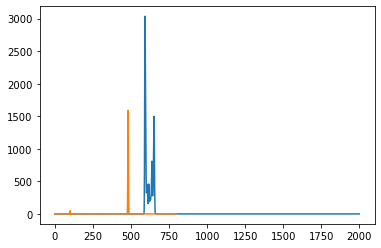

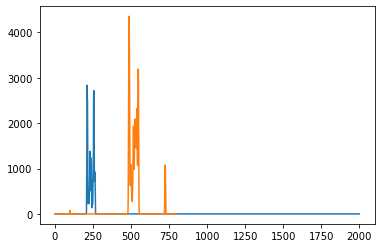

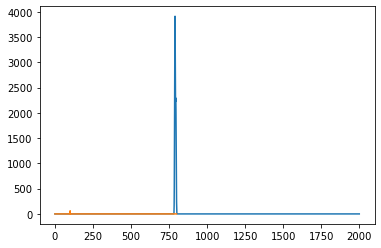

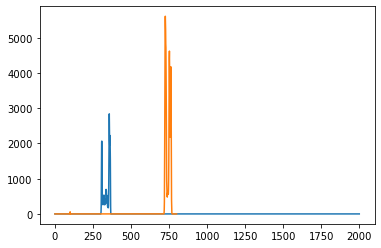

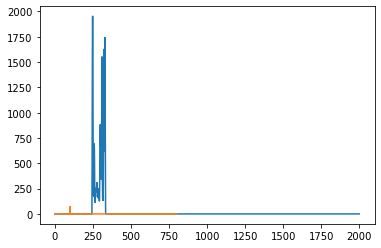

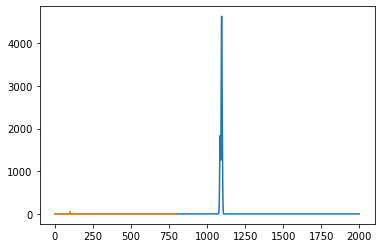

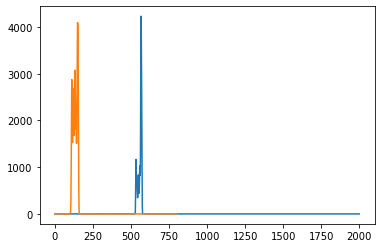

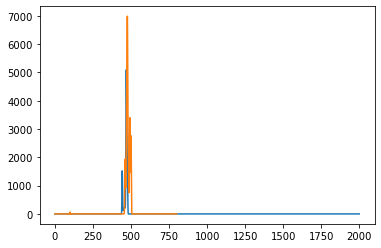

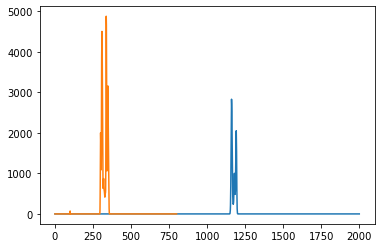

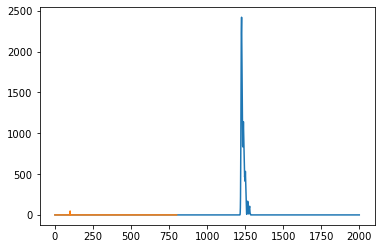

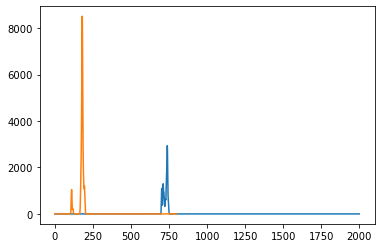

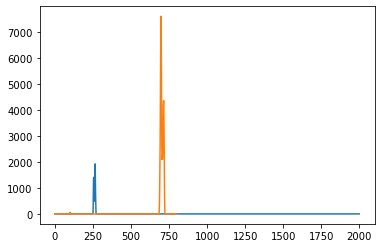

In [21]:
for event in range(len(full_events_summed_tp)):
    plt.plot(fast_events_summed_tp[event])
    plt.plot(full_events_summed_tp[event])
    plt.show()

In [9]:
full_summed_sipms = np.sum(np.sum(full_sipm_events, axis=1),axis=1)

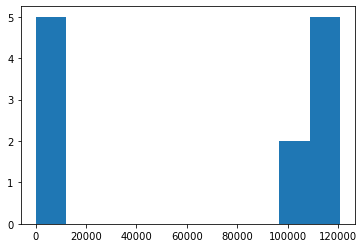

In [10]:
plt.hist(full_summed_sipms)
plt.show()

In [11]:
full_config = pd.read_hdf(full_file_name, "MC/configuration")

In [12]:
full_config

,param_key,param_value,file_index
0,event_type,other,0
1,num_events,10,0
2,saved_events,10,0
3,interacting_events,10,0
4,PmtR11410_binning,0.025000 mus,0
...,...,...,...
72,/event/verbose,0,0
73,/tracking/verbose,0,0
74,/nexus/random_seed,2,0
75,/nexus/persistency/start_id,10,0


(array([ 1.,  1.,  4.,  5.,  2.,  3., 10.,  9., 45., 20.]),
 array([ 3570. ,  9052.8, 14535.6, 20018.4, 25501.2, 30984. , 36466.8,
        41949.6, 47432.4, 52915.2, 58398. ]),
 <a list of 10 Patch objects>)

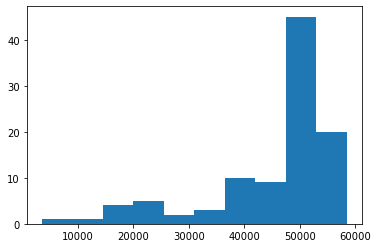

In [2]:
waveform_file = '/Users/taylorcontreras/Development/Research/trackingplane/data/fast_sims/flex_0vbb_fast_size1.3_pitch15.00.1.waveforms.h5'
waveform_sipms = pd.read_hdf(waveform_file, 'SiPM/Waveforms')
event_charge = waveform_sipms.groupby('event_id').apply(lambda grp: np.sum(grp.charge))
plt.hist(event_charge)

In [8]:
fast_file = "/Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.10.detsim.h5"
fast_sim = pd.read_hdf(fast_file, 'SiPM/Waveforms')

full_file = "/Users/taylorcontreras/Development/Research/trackingplane/data/full_sims/flex.0vbb.fullsim.10.waveforms.h5"
full_sim = pd.read_hdf(full_file, 'SiPM/Waveforms')

KeyError: 'No object named SiPM/Waveforms in the file'

In [12]:
fast_sim.event_id.min()

5000

In [10]:
full_sim[full_sim.event_id==500]

,event_id,charge,charge_corr,Z
0,500,11,11.590996,628
1,500,10,10.543418,635
2,500,5,5.271709,635
3,500,6,6.324469,632
4,500,13,13.713298,641
...,...,...,...,...
3303,500,18,18.982897,638
3304,500,13,13.701875,631
3305,500,12,12.651047,634
3306,500,17,17.931280,640


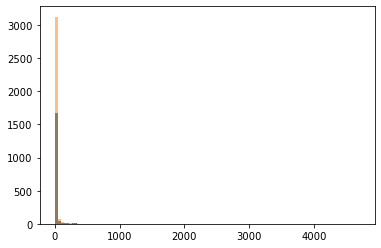

In [19]:
fast_event = fast_sim[fast_sim.event_id==5000]
full_event = full_sim[full_sim.event_id==500]
plt.hist(fast_event.charge, bins=100)
plt.hist(full_event.charge, alpha=0.5, bins=100)
plt.show()

In [22]:
print(fast_event.charge.max(), full_event.charge.max())
print(fast_event.charge.min(), full_event.charge.min())
print(fast_event.charge.mean(), full_event.charge.mean())
print(fast_event.charge.std(), full_event.charge.std())
print(fast_event.charge.sum(), full_event.charge.sum())
print(fast_event.charge.count(), fast_event.charge.count())

4341 4700
1 1
54.836092715231786 36.343712212817415
286.2317201786148 220.22241430583188
99363 120225
1812 1812


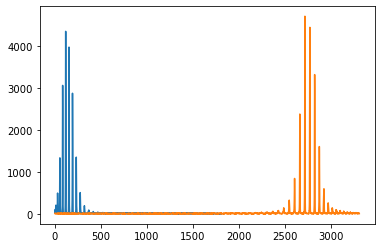

In [24]:
plt.plot(fast_event.charge)
plt.plot(full_event.charge)

In [25]:
full_event.charge

0       11
1       10
2        5
3        6
4       13
        ..
3303    18
3304    13
3305    12
3306    17
3307     9
Name: charge, Length: 3308, dtype: int64

In [27]:
full_nexus_file = "/Users/taylorcontreras/Development/Research/trackingplane/data/full_sims/flex.kr83m.10.nexus.h5"
full_nexus = pd.read_hdf(full_nexus_file, 'MC/sns_response')

In [33]:
sns_response = pd.read_hdf(full_nexus_file, 'MC/sns_response')
sns_positions = pd.read_hdf(full_nexus_file, 'MC/sns_positions')

# Sort to get the sipms
sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]

# Sort to sum up all charges for each sipms
sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
# Sum of charges in sipms per event
this = sipm_response.groupby('event_id')
charges = this.agg({"charge":"sum"})

In [37]:
charges.charge

event_id
1000     640
1001    2028
1002    2054
1003    1984
1004    1940
        ... 
1095    1974
1096    2142
1097    2076
1098    2039
1099    1984
Name: charge, Length: 100, dtype: uint32

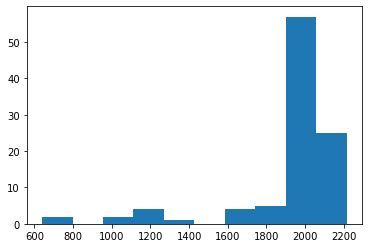

In [38]:
plt.hist(charges.charge)
plt.show()

In [29]:
full_sim.event_id.max()

NameError: name 'full_sim' is not defined

In [5]:
full_buffy_file = "/Users/taylorcontreras/Development/Research/trackingplane/data/full_sims/flex.0vbb.10.fullsim_buffy.h5"
full_buffy_hits = pd.read_hdf(full_buffy_file, 'MC/hits')
full_buffy_sns_response = pd.read_hdf(full_buffy_file, 'MC/sns_response')
with tb.open_file(full_buffy_file) as file:
    full_pmtrd  = file.root.pmtrd[1]
    full_sipmrd = file.root.sipmrd[1]

In [40]:
print(f"Number of PMTs : {full_pmtrd.shape[0]}")
print(f"Number of SiPMs: {full_sipmrd.shape[0]}")
print(f"Length of PMT  waveforms: {full_pmtrd.shape[1]} = {full_pmtrd.shape[1]//40} mus") # 40 25-ns bins in a mus
print(f"Length of SiPM waveforms:  {full_sipmrd.shape[1]} = {full_sipmrd.shape[1]//1} mus")
print(f"Events: {full_sipmrd.shape}")

Number of PMTs : 60
Number of SiPMs: 3308
Length of PMT  waveforms: 80000 = 2000 mus
Length of SiPM waveforms:  2000 = 2000 mus
Events: (3308, 2000)


In [15]:
full_buffy_hits

,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,100,2,0,-241.206131,281.097961,578.980042,0.003448,0.004572,ACTIVE
1,100,2,1,-241.987976,280.721313,578.486267,0.006914,0.003911,ACTIVE
2,100,2,2,-242.817795,280.312439,578.111816,0.010379,0.006572,ACTIVE
3,100,2,3,-243.605255,279.739929,578.164185,0.013766,0.009720,ACTIVE
4,100,2,4,-244.327881,279.066559,578.281433,0.017222,0.005350,ACTIVE
...,...,...,...,...,...,...,...,...,...
5734,109,1,149,-433.110474,-65.975861,1070.198730,0.396808,0.000146,ACTIVE
5735,109,1,150,-433.109863,-65.975769,1070.198486,0.396828,0.000087,ACTIVE
5736,109,1,151,-433.109436,-65.975769,1070.199097,0.396850,0.000256,ACTIVE
5737,109,1,152,-433.109589,-65.975456,1070.199341,0.396865,0.000112,ACTIVE


In [3]:
fast_detsim_file = "/Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.10.detsim.h5"
fast_detsim_hits = pd.read_hdf(fast_detsim_file, 'MC/hits')
fast_detsim_sns_response = pd.read_hdf(fast_detsim_file, 'MC/sns_response')

Event 0


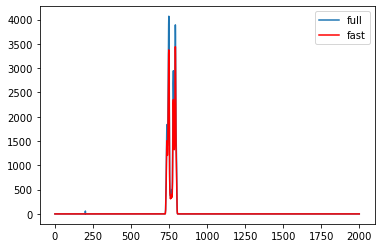

120225 100741
Event 1


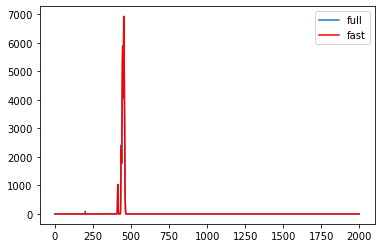

119236 115707
Event 2


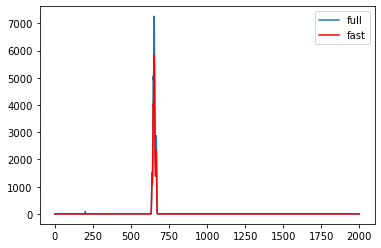

113210 90888
Event 3


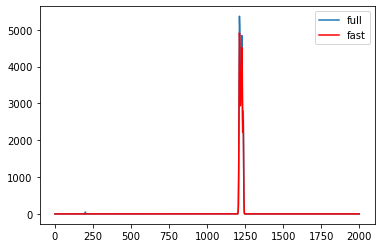

120423 109919
Event 4


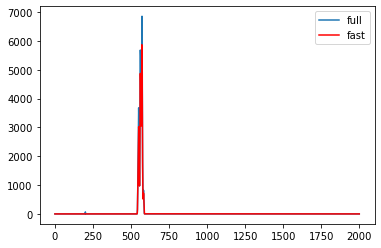

120664 104218
Event 5


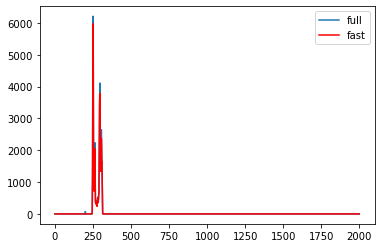

106449 100040
Event 6


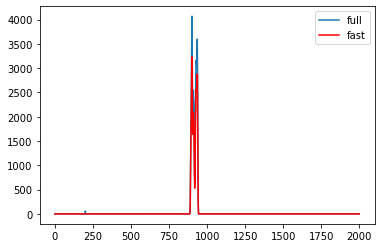

120270 99133
Event 7


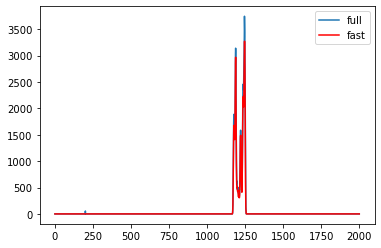

119980 109894
Event 8


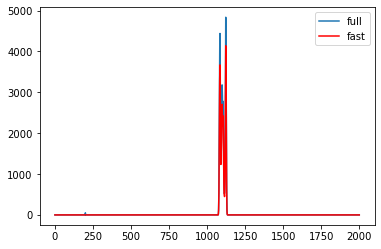

120339 102318
Event 9


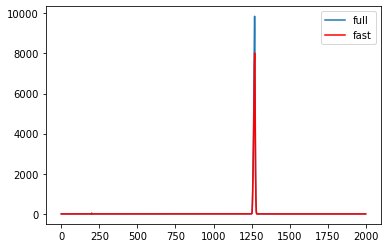

114136 92805


NameError: name 'h5' is not defined

In [13]:
num_events = 10
fast_h5 = tb.open_file(fast_detsim_file)
fast_event_map_MC = pd.read_hdf(fast_detsim_file, 'MC/event_mapping')
fast_event_map = pd.read_hdf(fast_detsim_file, 'Run/eventMap')
full_h5 = tb.open_file(full_buffy_file)
full_event_map_MC = pd.read_hdf(full_buffy_file, 'MC/event_mapping')
full_event_map = pd.read_hdf(full_buffy_file, 'Run/eventMap')

for evt in range(0,num_events):
    print(f'Event {evt}')
    try:
        fast_h5.root.sipmrd[evt, :]
        full_h5.root.sipmrd[evt, :]
    except:
        continue
    plt.plot(np.sum(full_h5.root.sipmrd[evt,:], axis=0), label='full')
    plt.plot(np.sum(fast_h5.root.sipmrd[evt,:], axis=0), color='r',label='fast')
    plt.legend()
    plt.show()
    
    print(np.sum(full_h5.root.sipmrd[evt,:]), np.sum(fast_h5.root.sipmrd[evt,:]))

h5.close()

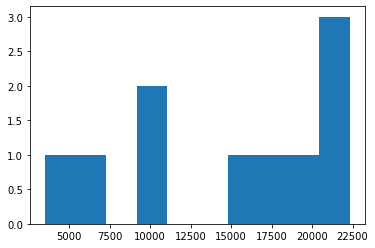

In [12]:
plt.hist(diffs)
plt.show()

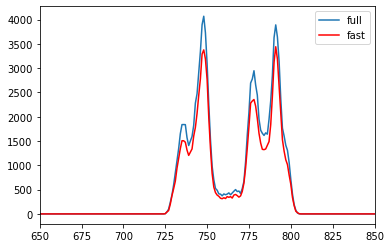

In [76]:
num_events = 10
fast_h5 = tb.open_file(fast_detsim_file)
fast_event_map_MC = pd.read_hdf(fast_detsim_file, 'MC/event_mapping')
fast_event_map = pd.read_hdf(fast_detsim_file, 'Run/eventMap')
full_h5 = tb.open_file(full_buffy_file)
full_event_map_MC = pd.read_hdf(full_buffy_file, 'MC/event_mapping')
full_event_map = pd.read_hdf(full_buffy_file, 'Run/eventMap')

evt = 0
fast_h5.root.sipmrd[evt, :]
full_h5.root.sipmrd[evt, :]

plt.plot(np.sum(full_h5.root.sipmrd[evt,:], axis=0), label='full')
plt.plot(np.sum(fast_h5.root.sipmrd[evt,:], axis=0), color='r', label='fast')
plt.xlim(650,850)
plt.legend()
plt.show()

In [34]:
print(f"Number of PMTs : {fast_pmtrd.shape[0]}")
print(f"Number of SiPMs: {fast_sipmrd.shape[0]}")
print(f"Length of PMT  waveforms: {fast_pmtrd.shape[1]} = {fast_pmtrd.shape[1]//40} mus") # 40 25-ns bins in a mus
print(f"Length of SiPM waveforms:  {fast_sipmrd.shape[1]} = {fast_sipmrd.shape[1]//1} mus")

Number of PMTs : 60
Number of SiPMs: 3308
Length of PMT  waveforms: 80000 = 2000 mus
Length of SiPM waveforms:  2000 = 2000 mus


In [12]:
fast_detsim_hits

,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,100,2,0,-241.206131,281.097961,578.980042,0.003448,0.004572,ACTIVE
1,100,2,1,-241.987976,280.721313,578.486267,0.006914,0.003911,ACTIVE
2,100,2,2,-242.817795,280.312439,578.111816,0.010379,0.006572,ACTIVE
3,100,2,3,-243.605255,279.739929,578.164185,0.013766,0.009720,ACTIVE
4,100,2,4,-244.327881,279.066559,578.281433,0.017222,0.005350,ACTIVE
...,...,...,...,...,...,...,...,...,...
5734,109,1,149,-433.110474,-65.975861,1070.198730,0.396808,0.000146,ACTIVE
5735,109,1,150,-433.109863,-65.975769,1070.198486,0.396828,0.000087,ACTIVE
5736,109,1,151,-433.109436,-65.975769,1070.199097,0.396850,0.000256,ACTIVE
5737,109,1,152,-433.109589,-65.975456,1070.199341,0.396865,0.000112,ACTIVE


In [13]:
fast_event = fast_detsim_hits[fast_detsim_hits.event_id==100]
full_event = full_buffy_hits[full_buffy_hits.event_id==100]

fast_event.energy.sum(), full_event.energy.sum()

(2.4578304, 2.4578304)

2.4578304 2.4578304


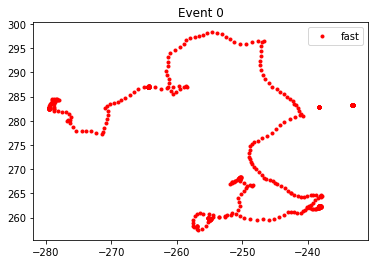

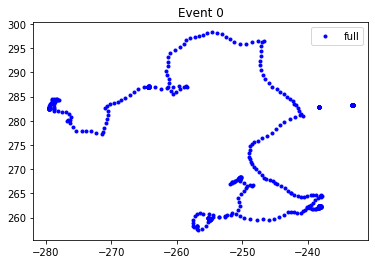

2.4578302 2.4578302


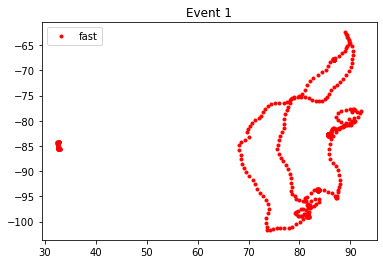

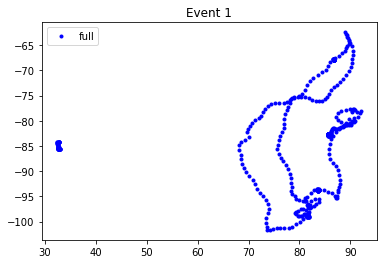

2.4578302 2.4578302


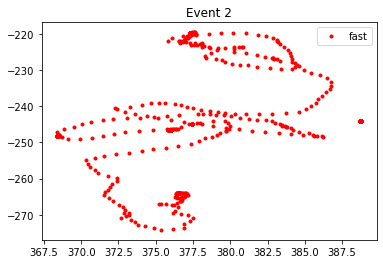

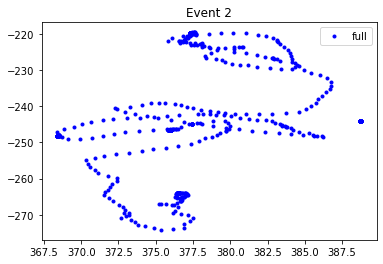

2.4578302 2.4578302


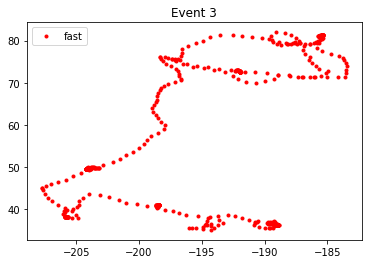

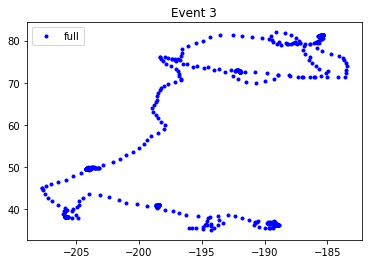

2.4578304 2.4578304


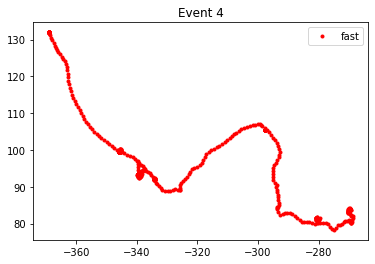

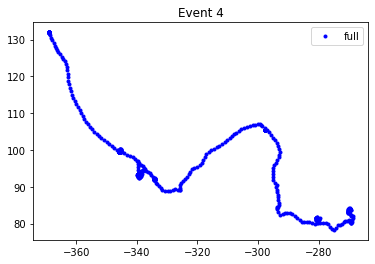

2.1739616 2.1739616


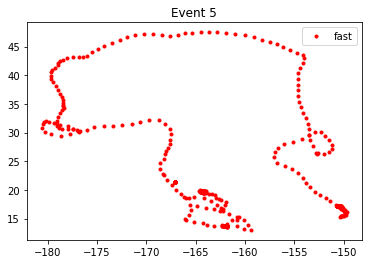

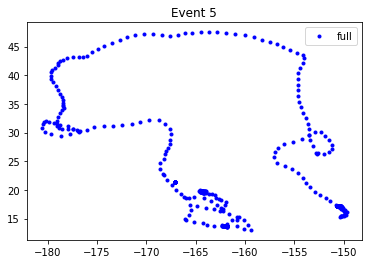

2.4578304 2.4578304


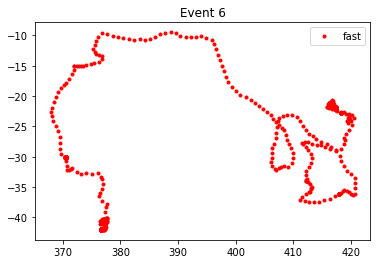

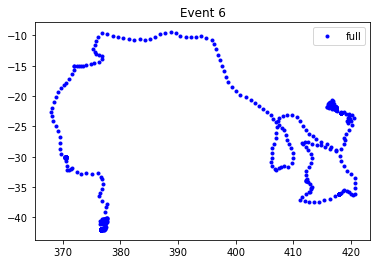

2.45783 2.45783


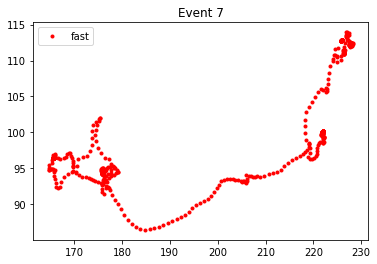

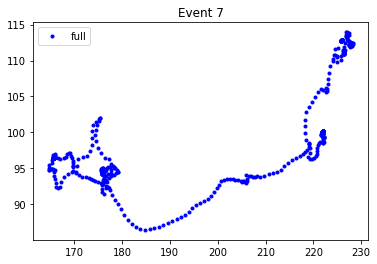

2.45783 2.45783


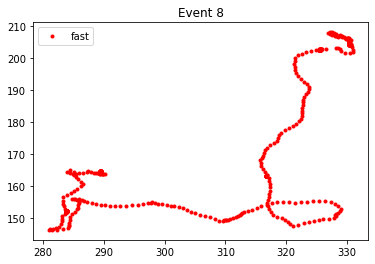

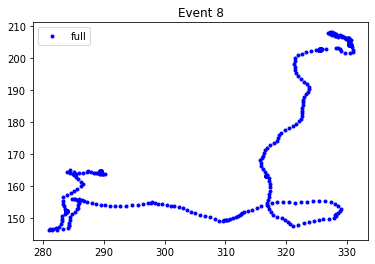

2.4578302 2.4578302


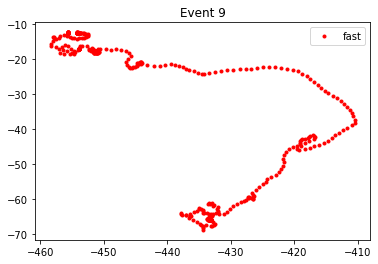

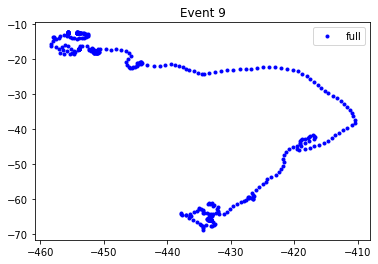

In [14]:
for event in range(0,10):
    fast_event = fast_detsim_hits[fast_detsim_hits.event_id==100+event]
    full_event = full_buffy_hits[full_buffy_hits.event_id==100+event]
    print(fast_event.energy.sum(), full_event.energy.sum())
    plt.plot(fast_event.x, fast_event.y, '.', color='r', label='fast')
    plt.title('Event '+str(event))
    plt.legend()
    plt.show()
    plt.plot(full_event.x, full_event.y, '.',color='b', label='full')
    plt.title('Event '+str(event))
    plt.legend()
    plt.show()

In [51]:
event = 55
full_event = full_buffy_sns_response[full_buffy_sns_response.event_id==event]
fast_event = fast_detsim_sns_response[fast_detsim_sns_response.event_id==event]

In [52]:
full_event = full_event.sort_values(by='time_bin')
fast_event = fast_event.sort_values(by='time_bin')

In [53]:
sns_response_sorted = full_event.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
response_bytime = sipm_response.groupby('time_bin')
summed_charges = response_bytime.agg({"charge":"sum"})
full_summed_charges = summed_charges.sort_values(by='time_bin')

sns_response_sorted = fast_event.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
response_bytime = sipm_response.groupby('time_bin')
summed_charges = response_bytime.agg({"charge":"sum"})
fast_summed_charges = summed_charges.sort_values(by='time_bin')

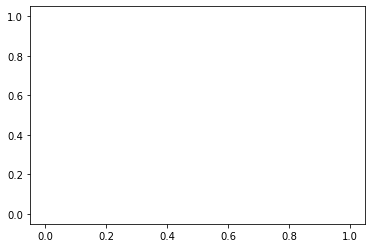

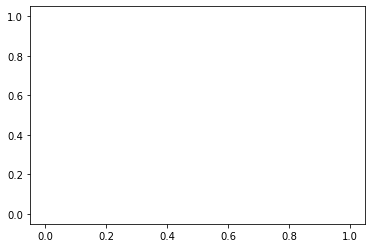

In [54]:
plt.plot(full_summed_charges.charge)
plt.show()
plt.plot(fast_summed_charges.charge)
plt.show()

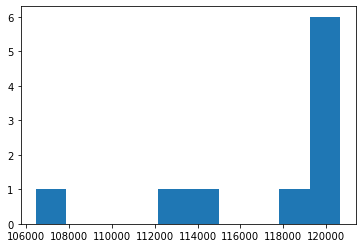

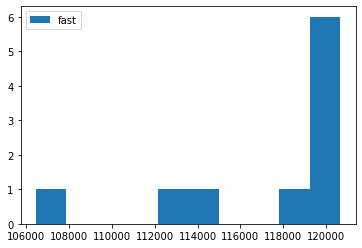

In [23]:
# Total charge in an event
sns_response_sorted = full_buffy_sns_response.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
this = sipm_response.groupby('event_id')
full_charges = this.agg({"charge":"sum"})

sns_response_sorted = fast_detsim_sns_response.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
this = sipm_response.groupby('event_id')
fast_charges = this.agg({"charge":"sum"})

plt.hist(full_charges.charge, label='full')
plt.show()
plt.hist(fast_charges.charge, label='fast')
plt.legend()
plt.show()

In [2]:
fast_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/'
full_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/full_sims/'
fast_file_start_str = 'flex.0vbb.'
fast_file_end_str = '.detsim.h5'
full_file_start_str = 'flex.0vbb.'
full_file_end_str = '.fullsim_buffy.h5'
num_events = 10
start = 1
num_files = 100
max_diff = 20000
bad_events = []
bad_events_pmts = []
diffs = []
diffs_pmt = []
for fnum in range(start,num_files):
    fast_h5file = fast_dir+fast_file_start_str+str(fnum)+fast_file_end_str
    full_h5file = full_dir+full_file_start_str+str(fnum)+full_file_end_str
    print(f'In file {fast_h5file}')

    fast_h5 = tb.open_file(fast_h5file)
    full_h5 = tb.open_file(full_h5file)

    event_map_MC = pd.read_hdf(fast_h5file, 'MC/event_mapping')
    event_map = pd.read_hdf(fast_h5file, 'Run/eventMap')
    
    index, event_id, sipm_charge, sipm_charge_corr, zval = [], [], [], [], []
    for evt in range(len(event_map.evt_number.to_list())):
        #print(f'Event {evt}')                                                                                                                                                   
        try:
            fast_h5.root.sipmrd[evt, :]
            full_h5.root.sipmrd[evt, :]
            
            fast_h5.root.pmtrd[evt, :]
            full_h5.root.pmtrd[evt, :]
        except:
            print(f"Couldn't open {fast_h5file} or {full_h5file}")
            continue

        full_charge = np.sum(full_h5.root.sipmrd[evt,:])
        fast_charge = np.sum(fast_h5.root.sipmrd[evt,:])
        pmt_full_charge = np.sum(full_h5.root.pmtrd[evt,:])
        pmt_fast_charge = np.sum(fast_h5.root.pmtrd[evt,:])
        diff = full_charge - fast_charge
        diff_pmt = pmt_full_charge - pmt_fast_charge
        diffs.append(diff)
        diffs_pmt.append(diff_pmt)
        if abs(diff) > max_diff:
            bad_events.append(event_map.nexus_evt.to_list()[evt])
        if abs(diff_pmt) > max_diff:
            bad_events_pmts.append(event_map.nexus_evt.to_list()[evt])

    fast_h5.close()
    full_h5.close()

In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.1.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.2.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.3.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.4.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.5.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.6.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.7.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.8.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.

In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.73.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.74.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.75.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.76.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.77.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.78.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.79.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.80.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_si

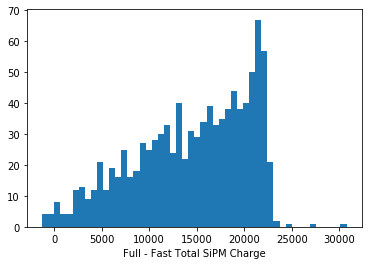

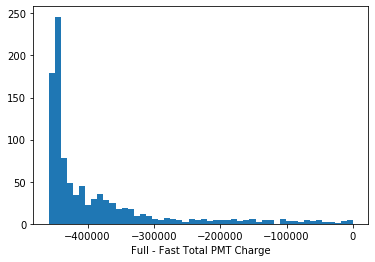

In [3]:
plt.hist(diffs, bins=50)
plt.xlabel('Full - Fast Total SiPM Charge')
plt.show()

plt.hist(diffs_pmt, bins=50)
plt.xlabel('Full - Fast Total PMT Charge')
plt.show()

In [4]:
len(bad_events_pmts)

978

(2000,)
(2000,)


/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


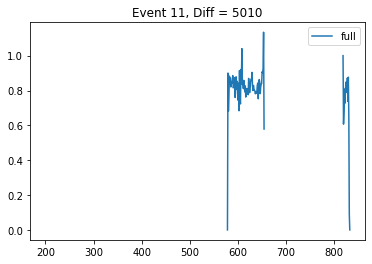

(2000,)
(2000,)


/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


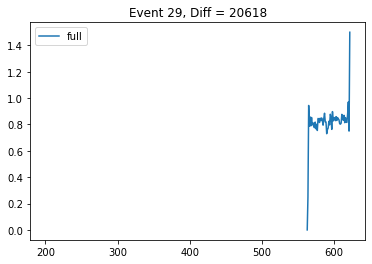

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


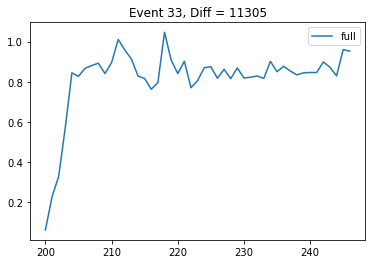

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


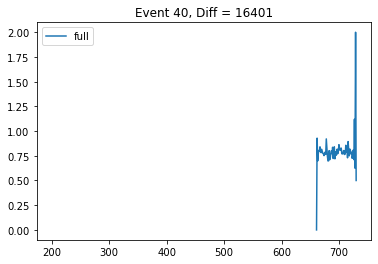

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


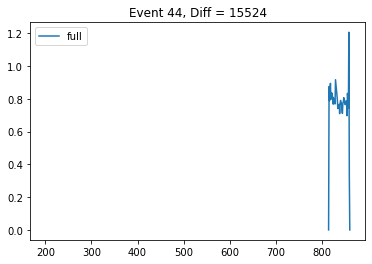

(2000,)
(2000,)


/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


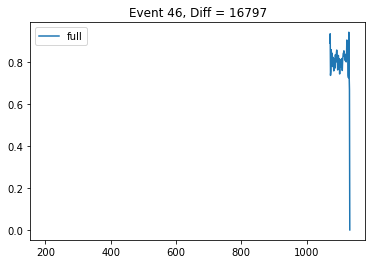

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


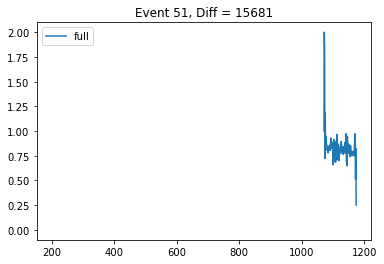

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


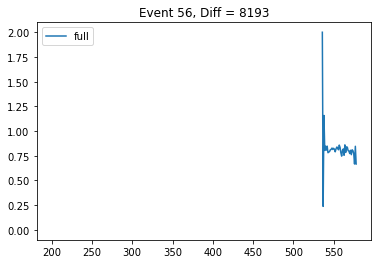

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


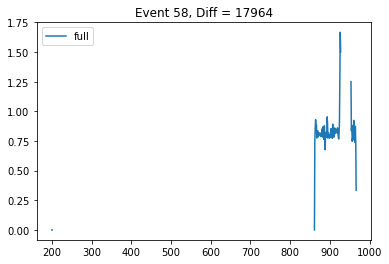

/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/taylorcontreras/anaconda3/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


(2000,)
(2000,)


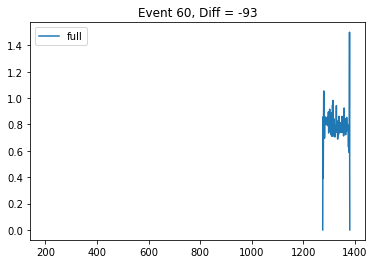

In [26]:
xs = []
ys = []
zs = []
for fnum in range(start,num_files):
    fast_h5file = fast_dir+fast_file_start_str+str(fnum)+fast_file_end_str
    full_h5file = full_dir+full_file_start_str+str(fnum)+full_file_end_str

    fast_h5 = tb.open_file(fast_h5file)
    full_h5 = tb.open_file(full_h5file)
    
    fast_hits = pd.read_hdf(fast_h5file, 'MC/hits')
    full_hits = pd.read_hdf(full_h5file, 'MC/hits')

    event_map_MC = pd.read_hdf(fast_h5file, 'MC/event_mapping')
    event_map = pd.read_hdf(fast_h5file, 'Run/eventMap')
    events = event_map.nexus_evt.to_list()

    index, event_id, sipm_charge, sipm_charge_corr, zval = [], [], [], [], []
    for evt in range(len(events)):
        if events[evt] in bad_events[0:10]:
            #print(f'Event {evt}')                                                                                                                                                   
            try:
                fast_h5.root.sipmrd[evt, :]
                full_h5.root.sipmrd[evt, :]
            except:
                print(f"Couldn't open {fast_h5file} or {full_h5file}")
                continue
            
            hits_evt = fast_hits[fast_hits.event_id==events[evt]]
            xs.append(hits_evt.x.mean())
            ys.append(hits_evt.y.mean())
            zs.append(hits_evt.z.mean())
            print(np.shape(np.sum(full_h5.root.sipmrd[evt,:], axis=0)/np.sum(fast_h5.root.sipmrd[evt,:], axis=0)))
            print(np.shape(np.sum(full_h5.root.sipmrd[evt,:], axis=0)))
            plt.plot(np.sum(fast_h5.root.sipmrd[evt,:], axis=0)/np.sum(full_h5.root.sipmrd[evt,:], axis=0), label='full')
            #plt.plot(np.sum(fast_h5.root.sipmrd[evt,:], axis=0), color='r',label='fast')
            plt.title('Event '+str(events[evt])+', Diff = '+str(diffs[bad_events.index(events[evt])]))
            #plt.xlim(750,900)
            plt.legend()
            plt.show()
            
            #plt.plot(hits_evt.x, hits_evt.y, '.')
            #plt.title('Event '+str(events[evt]))
            #plt.show()

    fast_h5.close()
    full_h5.close()

In [87]:

diffs[bad_events.index(44)]

15524

In [95]:
rs = np.array(np.sqrt(np.array(xs)**2 + np.array(ys)**2))
rs

array([409.48334, 401.43655, 345.77182, 456.56497, 465.90637, 419.7021 ,
       432.5116 , 430.86942, 419.65103, 453.73123, 398.5505 , 424.91226,
       444.0669 , 376.04807, 429.76437, 417.5558 , 392.36682, 398.6645 ,
       440.56055, 465.15982, 449.45306, 398.42093, 443.6065 , 458.7871 ,
       398.75653, 456.81372, 418.0669 , 415.125  , 424.82614, 470.17923,
       438.83618, 442.67136, 419.47147, 428.79587, 451.0509 , 411.4582 ,
       442.3852 , 417.44458, 433.8194 , 452.0555 , 394.2667 , 397.30414,
       427.22235, 392.50534, 410.4896 , 418.84396, 444.10886, 393.16104,
       454.4799 , 458.98273, 412.09018, 429.13602, 453.51508, 413.80823,
       440.06454, 446.49838, 466.0685 , 445.13553, 456.30078, 389.9518 ,
       388.961  , 451.40366, 432.63867, 453.8779 , 389.4352 , 424.89136,
       433.9784 , 410.68024, 405.73032, 398.4525 , 443.6173 , 421.37662,
       438.96542, 424.32047, 440.68033, 456.53525, 397.166  , 384.01462,
       418.1352 , 393.2966 , 450.8121 , 450.3004 , 

In [8]:
plt.hist(xs, bins=20)
plt.title('Events with large difference in total SiPM charge')
plt.xlabel('x')
plt.show()

plt.hist(ys, bins=20)
plt.title('Events with large difference in total SiPM charge')
plt.xlabel('y')
plt.show()

plt.hist(zs, bins=20)
plt.title('Events with large difference in total SiPM charge')
plt.xlabel('z')
plt.show()

plt.hist(rs, bins=20)
plt.title('Events with large difference in total SiPM charge')
plt.xlabel('R')
plt.xlim(0,500)
plt.show()

NameError: name 'xs' is not defined

In [102]:
some_rs = np.sqrt(fast_hits.x.to_numpy()**2 + fast_hits.y.to_numpy()**2)

(array([ 441.,  103.,    0.,  620.,  231.,  776., 1105., 1047., 1133.,
         824.]),
 array([ 96.29   , 135.39104, 174.49207, 213.59311, 252.69414, 291.79517,
        330.8962 , 369.99725, 409.0983 , 448.1993 , 487.30035],
       dtype=float32),
 <a list of 10 Patch objects>)

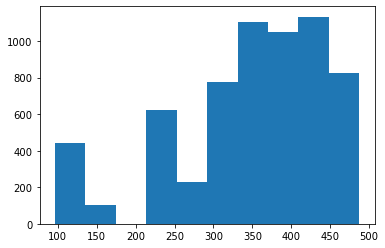

In [103]:
plt.hist(some_rs)

In [4]:
fast_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/'
full_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/full_sims/'
fast_file_start_str = 'flex.0vbb.'
fast_file_end_str = '.detsim.h5'
full_file_start_str = 'flex.0vbb.'
full_file_end_str = '.fullsim_buffy.h5'
num_events = 10
start = 1
num_files = 100
max_diff = 20000
bad_events = []
diffs = []
all_rs = np.empty(0,)
all_zs = np.empty(0,)
events = np.empty(0,)
for fnum in range(start,num_files):
    fast_h5file = fast_dir+fast_file_start_str+str(fnum)+fast_file_end_str
    full_h5file = full_dir+full_file_start_str+str(fnum)+full_file_end_str 
    fast_hits = pd.read_hdf(fast_h5file, 'MC/hits')
    events = np.append(events, fast_hits.event_id.to_numpy())
    
    all_zs = np.append(all_zs, fast_hits.z.to_numpy())
    all_rs = np.append(all_rs, np.sqrt(fast_hits.x.to_numpy()**2 + fast_hits.y.to_numpy()**2))

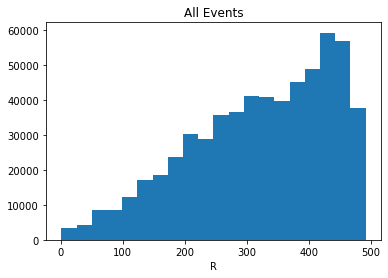

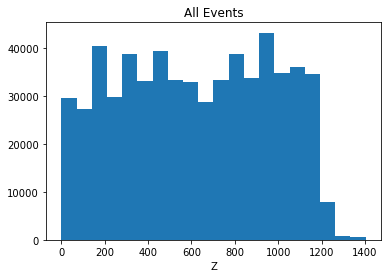

In [5]:
plt.hist(all_rs, bins=20)
plt.title('All Events')
plt.xlabel('R')
plt.show()

plt.hist(all_zs, bins=20)
plt.title('All Events')
plt.xlabel('Z')
plt.show()

In [15]:
fast_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/'
full_dir = '/Users/taylorcontreras/Development/Research/trackingplane/data/full_sims/'
fast_file_start_str = 'flex.0vbb.'
fast_file_end_str = '.detsim.h5'
full_file_start_str = 'flex.0vbb.'
full_file_end_str = '.fullsim_buffy.h5'
num_events = 10
start = 1
num_files = 100
max_diff = 20000
bad_events = []
diffs = []
ratio = []
i = 0
r_cutoff = 350
for fnum in range(start,num_files):
    fast_h5file = fast_dir+fast_file_start_str+str(fnum)+fast_file_end_str
    full_h5file = full_dir+full_file_start_str+str(fnum)+full_file_end_str
    print(f'In file {fast_h5file}')

    fast_h5 = tb.open_file(fast_h5file)
    full_h5 = tb.open_file(full_h5file)

    event_map_MC = pd.read_hdf(fast_h5file, 'MC/event_mapping')
    event_map = pd.read_hdf(fast_h5file, 'Run/eventMap')
    
    index, event_id, sipm_charge, sipm_charge_corr, zval = [], [], [], [], []
    for evt in range(len(event_map.evt_number.to_list())):
        #if all_rs[i] < r_cutoff:                                                                                                                                                  
        try:
            fast_h5.root.sipmrd[evt, :]
            full_h5.root.sipmrd[evt, :]
        except:
            print(f"Couldn't open {fast_h5file} or {full_h5file}")
            continue

        full_charge = np.sum(full_h5.root.sipmrd[evt,:])
        fast_charge = np.sum(fast_h5.root.sipmrd[evt,:])
        diff = full_charge - fast_charge
        diffs.append(diff)
        ratio.append(full_charge / fast_charge)
        if abs(diff) > max_diff:
            bad_events.append(event_map.nexus_evt.to_list()[evt])
        i += 1

    fast_h5.close()
    full_h5.close()

In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.1.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.2.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.3.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.4.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.5.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.6.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.7.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.8.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.

In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.73.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.74.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.75.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.76.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.77.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.78.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.79.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_sims/flex.0vbb.80.detsim.h5
In file /Users/taylorcontreras/Development/Research/trackingplane/data/fast_from_full_si

Text(0.5, 0, 'Fast / Full Total SiPM Charge')

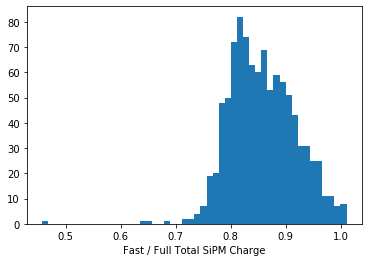

In [21]:
plt.hist(1/np.array(ratio), bins=50)
plt.xlabel('Fast / Full Total SiPM Charge')

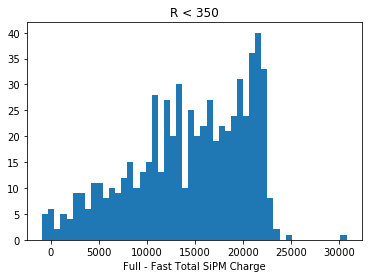

In [7]:
plt.hist(diffs, bins=50)
plt.title('R < 350')
plt.xlabel('Full - Fast Total SiPM Charge')
plt.show()

## PMTs

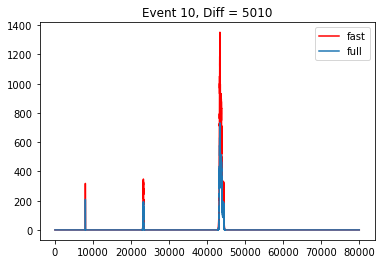

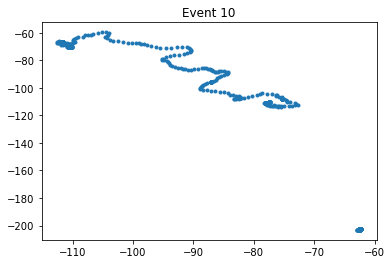

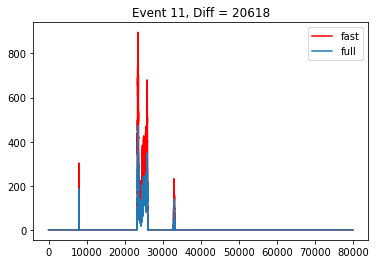

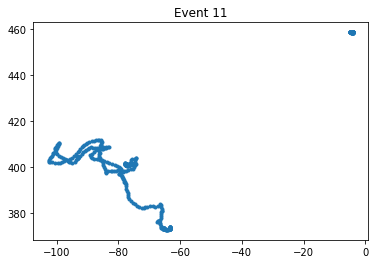

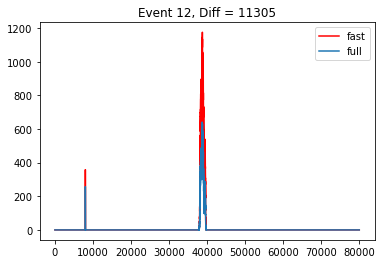

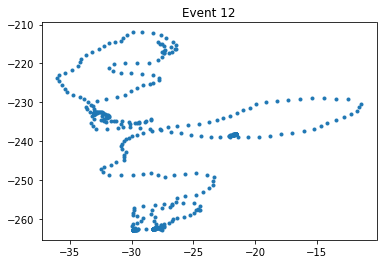

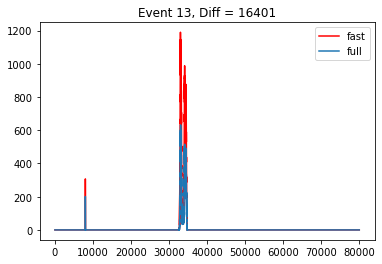

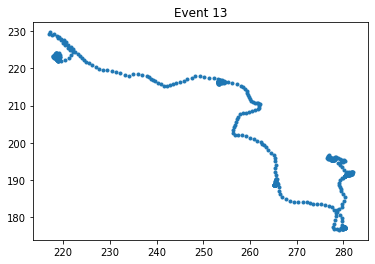

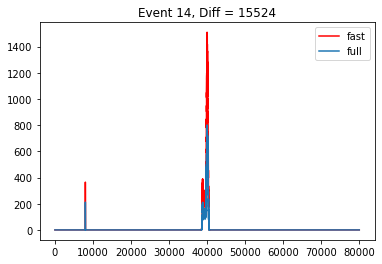

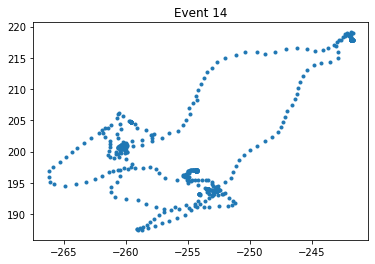

In [11]:
xs = []
ys = []
zs = []
for fnum in range(start,num_files):
    fast_h5file = fast_dir+fast_file_start_str+str(fnum)+fast_file_end_str
    full_h5file = full_dir+full_file_start_str+str(fnum)+full_file_end_str

    fast_h5 = tb.open_file(fast_h5file)
    full_h5 = tb.open_file(full_h5file)
    
    fast_hits = pd.read_hdf(fast_h5file, 'MC/hits')
    full_hits = pd.read_hdf(full_h5file, 'MC/hits')

    event_map_MC = pd.read_hdf(fast_h5file, 'MC/event_mapping')
    event_map = pd.read_hdf(fast_h5file, 'Run/eventMap')
    events = event_map.nexus_evt.to_list()

    index, event_id, sipm_charge, sipm_charge_corr, zval = [], [], [], [], []
    for evt in range(len(events)):
        if events[evt] in bad_events_pmts[0:5]:
            #print(f'Event {evt}')                                                                                                                                                   
            try:
                fast_h5.root.pmtrd[evt, :]
                full_h5.root.pmtrd[evt, :]
            except:
                print(f"Couldn't open {fast_h5file} or {full_h5file}")
                continue
            
            hits_evt = fast_hits[fast_hits.event_id==events[evt]]
            xs.append(hits_evt.x.mean())
            ys.append(hits_evt.y.mean())
            zs.append(hits_evt.z.mean())
            
            plt.plot(np.sum(fast_h5.root.pmtrd[evt,:], axis=0), color='r',label='fast')
            plt.plot(np.sum(full_h5.root.pmtrd[evt,:], axis=0), label='full')
            plt.title('Event '+str(events[evt])+', Diff = '+str(diffs[bad_events_pmts.index(events[evt])]))
            #plt.xlim(750,900)
            plt.legend()
            plt.show()
            
            plt.plot(hits_evt.x, hits_evt.y, '.')
            plt.title('Event '+str(events[evt]))
            plt.show()

    fast_h5.close()
    full_h5.close()